In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras import utils

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(f"x_train: {x_train.shape}, y_train: {y_train.shape} , x_test: {x_test.shape}, y_test: {y_test.shape}")

x_train: (60000, 28, 28), y_train: (60000,) , x_test: (10000, 28, 28), y_test: (10000,)


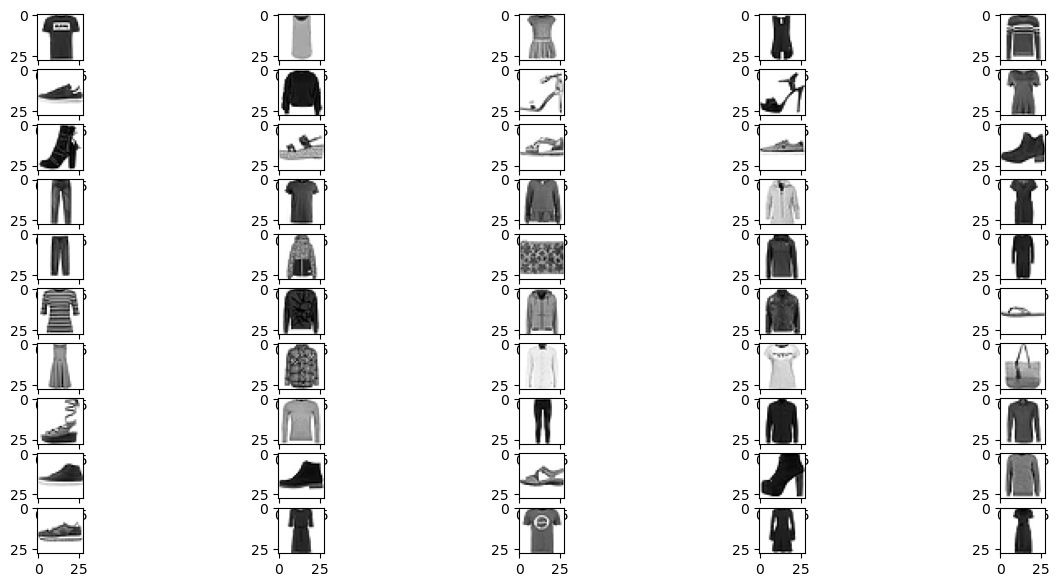

In [4]:

plt.figure(figsize=(15, 7))
for i in range(1, 51):
  plt.subplot(10, 5, i-1 + 1)
  plt.imshow(x_train[i],  cmap=plt.cm.binary)

In [5]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
num_classes = 10 # загальна кількість класів, у нашому випадку це цифри від 0 до 9
num_features = 784 # кількість атрибутів вхідного вектора 28 * 28 = 784
classes = { 0:"T-shirt/top(футболка)", 
            1: "Trouser(штани)",
            2: "Pullover(світер)",
            3: "Dress(плаття)",
            4: "Coat(пальто)",
            5: "shoes(туфлі)",
            6: "shirt(сорочка)",
            7: "sneakers(кросівки)",
            8: "bag(сумка)",
            9: "Ankle boot(чоботи)"}

# Перетворюємо матриці розміром 28x28 пікселів у вектор з 784 елементів
x_train, x_test = x_train.reshape(60000, 784 ), x_test.reshape(10000, 784 )

# Нормалізуємо значення пікселів
x_train, x_test = x_train / 255, x_test / 255
y_train, y_test = utils.to_categorical(y_train, num_classes), utils.to_categorical(y_test, num_classes)

print(f"x_train: {x_train.shape}, x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


x_train: (60000, 784), x_test: (10000, 784)
y_train: (60000, 10), y_test: (10000, 10)


 Тепер визначимо архітектуру. Нехай нейромережа складається з 3 шарів:

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras import losses
from keras import metrics

model = Sequential([
    Dense(900, activation='relu', input_shape=(784,)),
    Dense(500, activation='relu'),
    Dense(10, activation='softmax'),
])

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
# model.compile(
#     optimizer=optimizers.rmsprop_v2.RMSprop(learning_rate=0.001),
#     loss=losses.categorical_crossentropy,
#     metrics=[metrics.accuracy]
# )

In [8]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 900)               706500    
                                                                 
 dense_1 (Dense)             (None, 500)               450500    
                                                                 
 dense_2 (Dense)             (None, 10)                5010      
                                                                 
Total params: 1,162,010
Trainable params: 1,162,010
Non-trainable params: 0
_________________________________________________________________


Тепер все готово, щоб розпочати навчання нейронної мережі

In [9]:
history = model.fit(
    x_train,
    y_train,
    batch_size=500,
    epochs=20,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
96/96 [==============================] - 2s 12ms/step - loss: 0.1439 - accuracy: 0.7188 - val_loss: 0.0974 - val_accuracy: 0.8049
Epoch 2/20
96/96 [==============================] - 1s 9ms/step - loss: 0.0851 - accuracy: 0.8227 - val_loss: 0.0741 - val_accuracy: 0.8501
Epoch 3/20
96/96 [==============================] - 1s 9ms/step - loss: 0.0731 - accuracy: 0.8486 - val_loss: 0.0702 - val_accuracy: 0.8608
Epoch 4/20
96/96 [==============================] - 1s 9ms/step - loss: 0.0659 - accuracy: 0.8642 - val_loss: 0.0658 - val_accuracy: 0.8657
Epoch 5/20
96/96 [==============================] - 1s 8ms/step - loss: 0.0613 - accuracy: 0.8731 - val_loss: 0.0616 - val_accuracy: 0.8746
Epoch 6/20
96/96 [==============================] - 1s 9ms/step - loss: 0.0573 - accuracy: 0.8811 - val_loss: 0.0689 - val_accuracy: 0.8537
Epoch 7/20
96/96 [==============================] - 1s 9ms/step - loss: 0.0540 - accuracy: 0.8882 - val_loss: 0.0580 - val_accuracy: 0.8852
Epoch 8/20
96/96 [=

In [10]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [11]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]
epochs = range(1, len(history_dict['accuracy']) + 1)


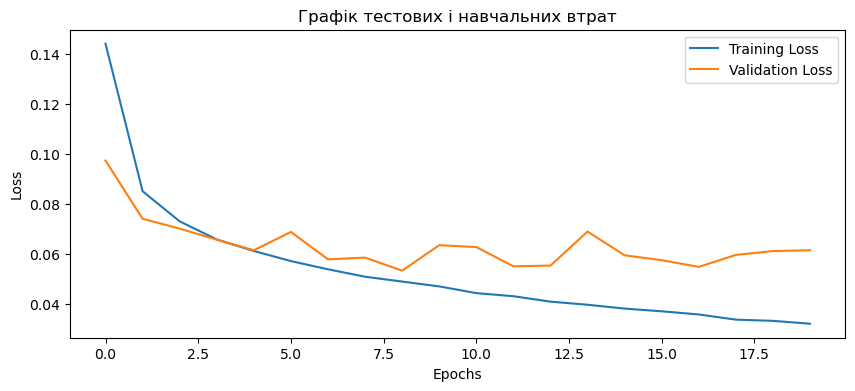

In [12]:
plt.subplots(figsize=(10, 4))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(loss_values, label='Training Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.title('Графік тестових і навчальних втрат')
plt.legend()
plt.show()

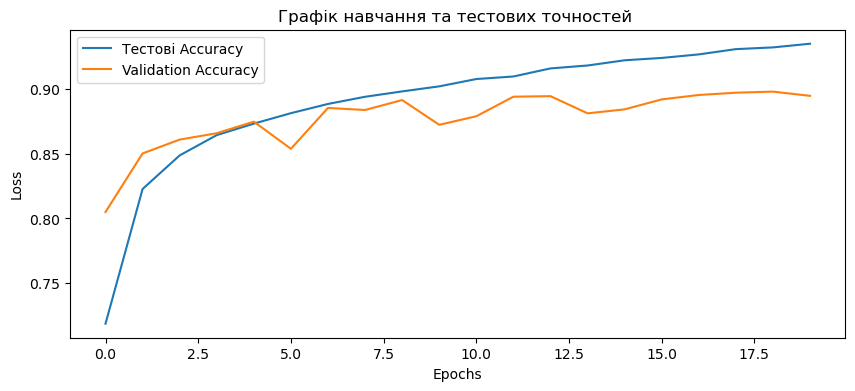

In [13]:
plt.subplots(figsize=(10, 4))
plt.plot(accuracy_values, label='Tестовi Accuracy')
plt.plot(val_acc_values, label='Validation Accuracy')
plt.title('Графік навчання та тестових точностей ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
result_test = model.evaluate(x_test, y_test)
result_train = model.evaluate(x_train, y_train)
print("Відсоток точності тестових даних: ", round(result_test[1] * 100, 2))
print("Відсоток точності навчальних даних: ", round(result_train[1] * 100, 2))

1875/1875 [==============================] - 9s 5ms/step - loss: 0.0351 - accuracy: 0.9316
Відсоток точності тестових даних:  88.82
Відсоток точності навчальних даних:  93.16


In [15]:
model = Sequential([
    Dense(900, activation='relu', input_shape=(784,)),
    Dense(500, activation='relu'),
    Dense(10, activation='softmax'),
])

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train,
    y_train,
    batch_size=500,
    epochs=20
)

result_test = model.evaluate(x_test, y_test)
result_train = model.evaluate(x_train, y_train)
print("Відсоток точності тестових даних: ", round(result_test[1] * 100, 2))
print("Відсоток точності навчальних даних: ", round(result_train[1] * 100, 2))

Epoch 1/20
120/120 [==============================] - 2s 9ms/step - loss: 0.1340 - accuracy: 0.7353
Epoch 2/20
120/120 [==============================] - 1s 7ms/step - loss: 0.0810 - accuracy: 0.8320
Epoch 3/20
120/120 [==============================] - 1s 7ms/step - loss: 0.0693 - accuracy: 0.8561
Epoch 4/20
120/120 [==============================] - 1s 7ms/step - loss: 0.0633 - accuracy: 0.8692
Epoch 5/20
120/120 [==============================] - 1s 7ms/step - loss: 0.0579 - accuracy: 0.8798
Epoch 6/20
120/120 [==============================] - 1s 7ms/step - loss: 0.0542 - accuracy: 0.8869
Epoch 7/20
120/120 [==============================] - 1s 8ms/step - loss: 0.0513 - accuracy: 0.8940
Epoch 8/20
120/120 [==============================] - 1s 8ms/step - loss: 0.0490 - accuracy: 0.8980
Epoch 9/20
120/120 [==============================] - 1s 7ms/step - loss: 0.0468 - accuracy: 0.9030
Epoch 10/20
120/120 [==============================] - 1s 8ms/step - loss: 0.0448 - accuracy: 0.9082

In [16]:
model.save("my_model.keras")
model.save("my_model")

In [19]:
model = keras.models.load_model("my_model.keras")

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 900)               706500    
                                                                 
 dense_4 (Dense)             (None, 500)               450500    
                                                                 
 dense_5 (Dense)             (None, 10)                5010      
                                                                 
Total params: 1,162,010
Trainable params: 1,162,010
Non-trainable params: 0
_________________________________________________________________


Bикористaти її для класифікації  даних , скористуємося методом predict

1/1 [==============================] - 0s 30ms/step
Клас номер: 0
Клас одягу: T-shirt/top(футболка)


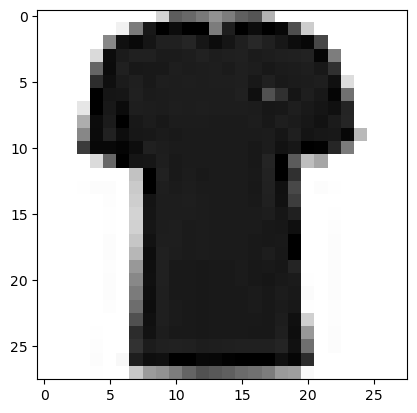

In [32]:
imege_number = 6533

x = np.expand_dims(x_test[imege_number], axis=0)
prediction = model.predict(x)
prediction = np.argmax(prediction[0])

plt.imshow(x_test[imege_number].reshape(28, 28),  cmap=plt.cm.binary)
print(f"Клас номер: {prediction}")
print(f"Клас одягу: {classes[prediction]}")